In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load sample dataset (using Seaborn's built-in "tips" dataset for simplicity)
tips = sns.load_dataset('tips')

print("\nFirst 5 rows")
print(tips.head())

print("\n Shape of datasets (rows, columns)")
print(tips.shape)

print("\n Columns info")
print(tips.info())

print("\n Summary statistics")
print(tips.describe())


First 5 rows
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

 Shape of datasets (rows, columns)
(244, 7)

 Columns info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

 Summary statistics
       total_bill         tip  

In [5]:
print("\n Unique values in categorical columns: ")
for col in tips.select_dtypes(include=['object']).columns:
    print(f"\n {col}: {tips[col].unique()}")

print("\n Missing values per column:")
print(tips.isnull().sum())


 Unique values in categorical columns: 

 Missing values per column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


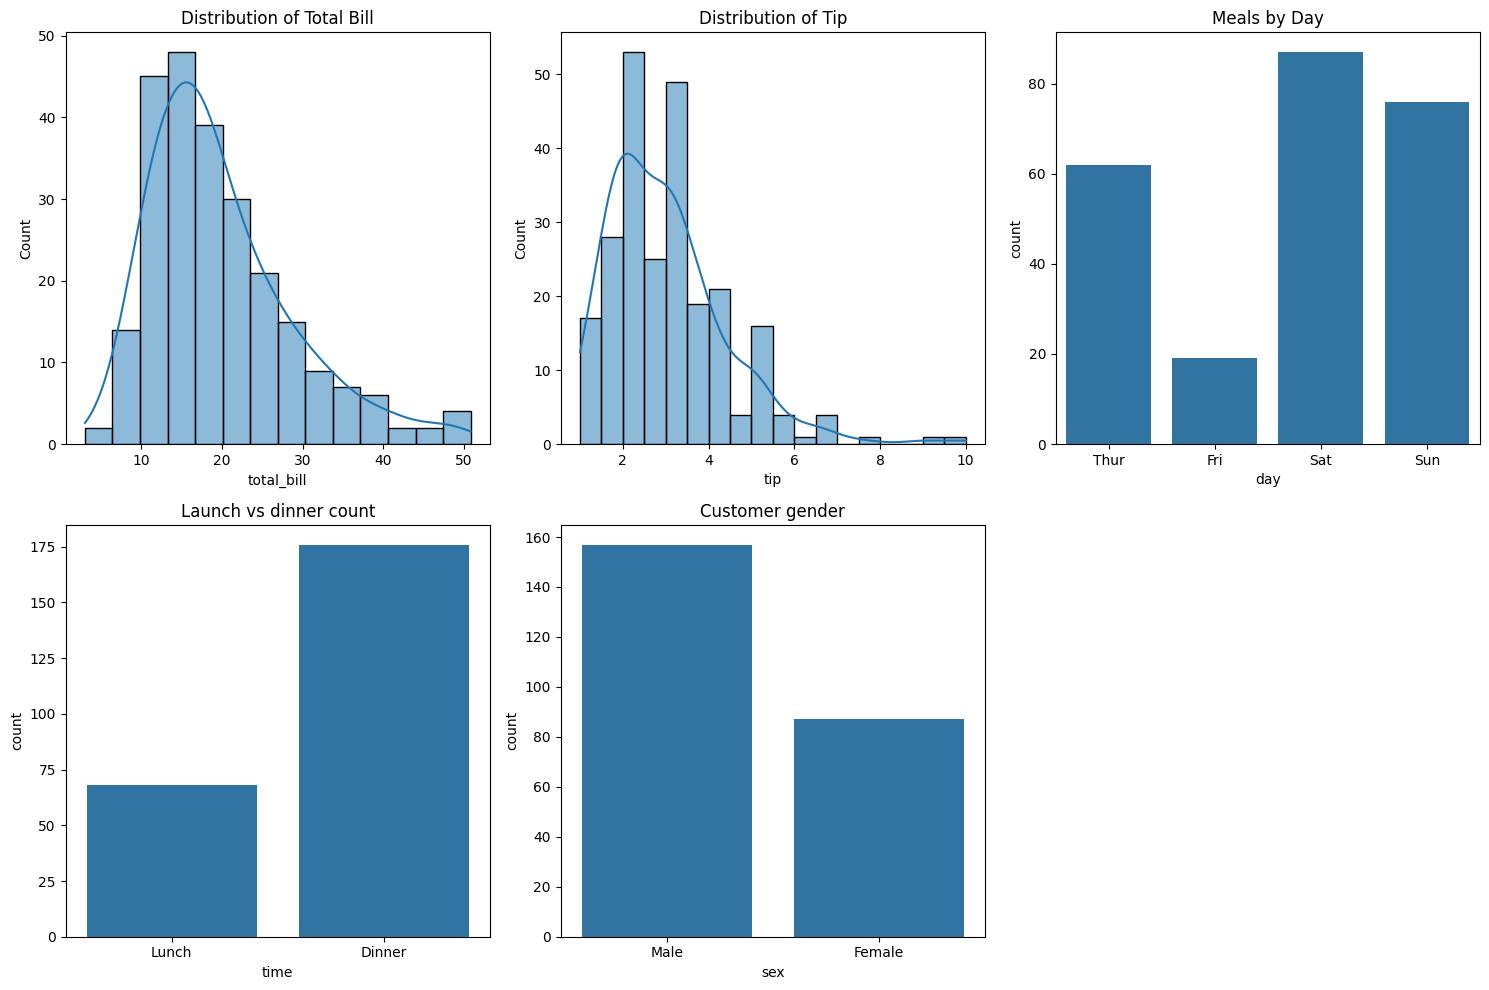

In [16]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# 3. Distribution Analysis
# 3.1 Histogram for numerical variables
plt.subplot(2, 3, 1)
sns.histplot(tips['total_bill'], kde=True)
plt.title('Distribution of Total Bill')

plt.subplot(2, 3, 2)
sns.histplot(tips['tip'], kde=True)
plt.title('Distribution of Tip')

# 3.2 Count plots for categorical variables
plt.subplot(2,3,3)
sns.countplot(x='day', data=tips)
plt.title('Meals by Day')

plt.subplot(2,3,4)
sns.countplot(x='time', data=tips)
plt.title('Launch vs dinner count')

plt.subplot(2,3,5)
sns.countplot(x='sex', data=tips)
plt.title('Customer gender')

plt.tight_layout()
plt.show()
plt.close()

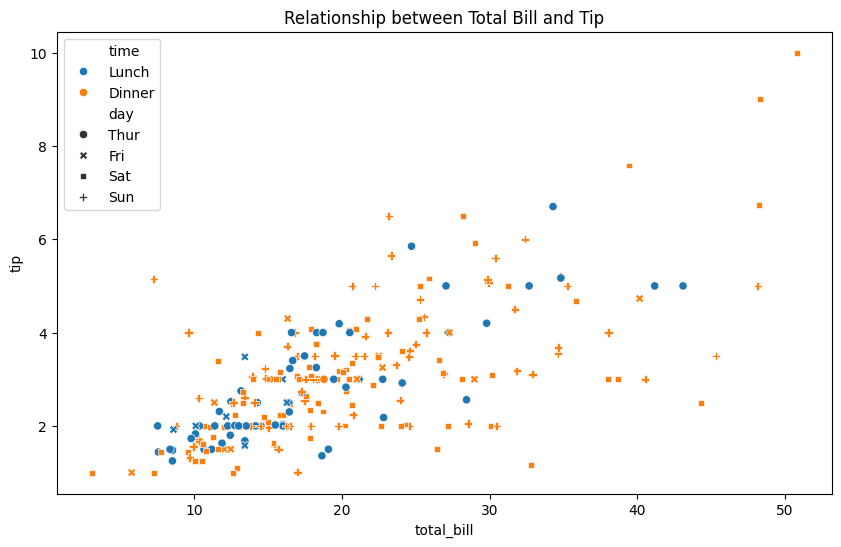

In [15]:
# 4. Relationship Analysis
# 4.1 Scatter plot to show relationship between total bill and tip

plt.figure(figsize=(10,6))
sns.scatterplot(x='total_bill', y='tip', hue='time', style='day', data=tips)
plt.title('Relationship between Total Bill and Tip')
plt.show()
plt.close()

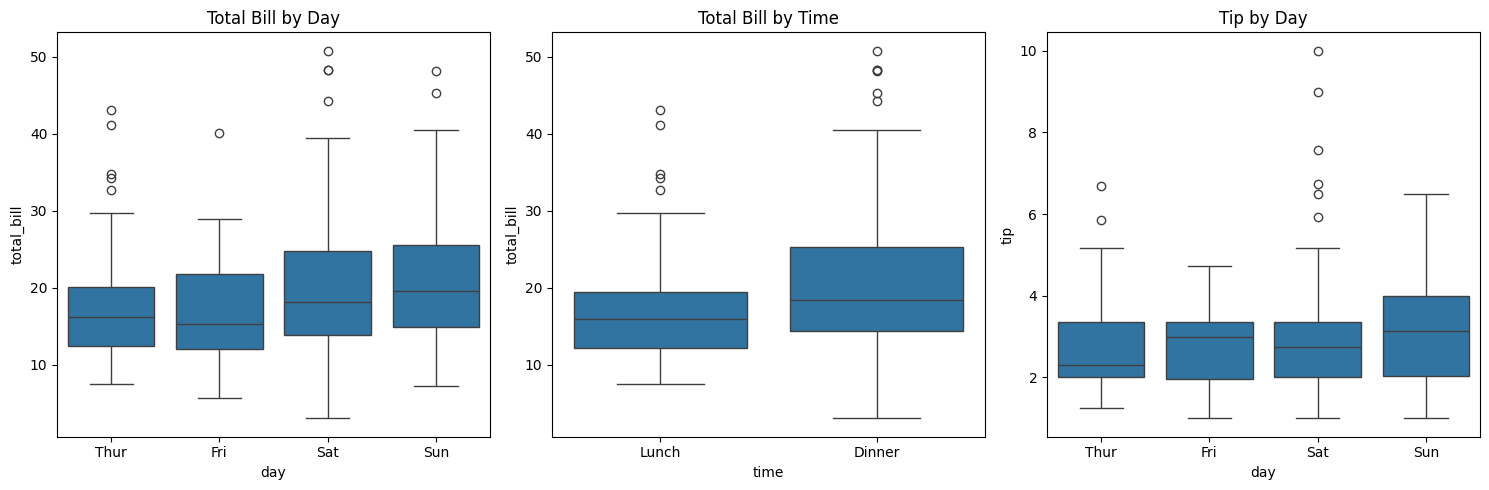

In [14]:
# 4.2 Box plots to analyze categorical vs numerical relationships
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Total Bill by Day')

plt.subplot(1,3,2)
sns.boxplot(x='time', y='total_bill', data=tips)
plt.title('Total Bill by Time')

plt.subplot(1,3,3)
sns.boxplot(x='day', y='tip', data=tips)
plt.title('Tip by Day')
plt.tight_layout()
plt.show()
plt.close()

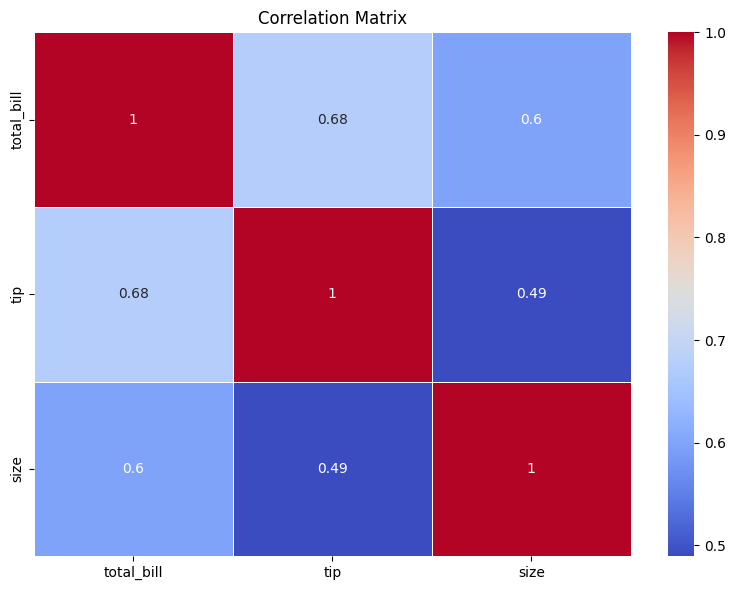

In [19]:
# 5. Correlation Analysis
plt.figure(figsize=(8,6))
# Get numerical columns only
num_tips = tips.select_dtypes(include=[np.number])
# Create correlation matrix
corr = num_tips.corr()
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
plt.close()

<Figure size 1000x800 with 0 Axes>

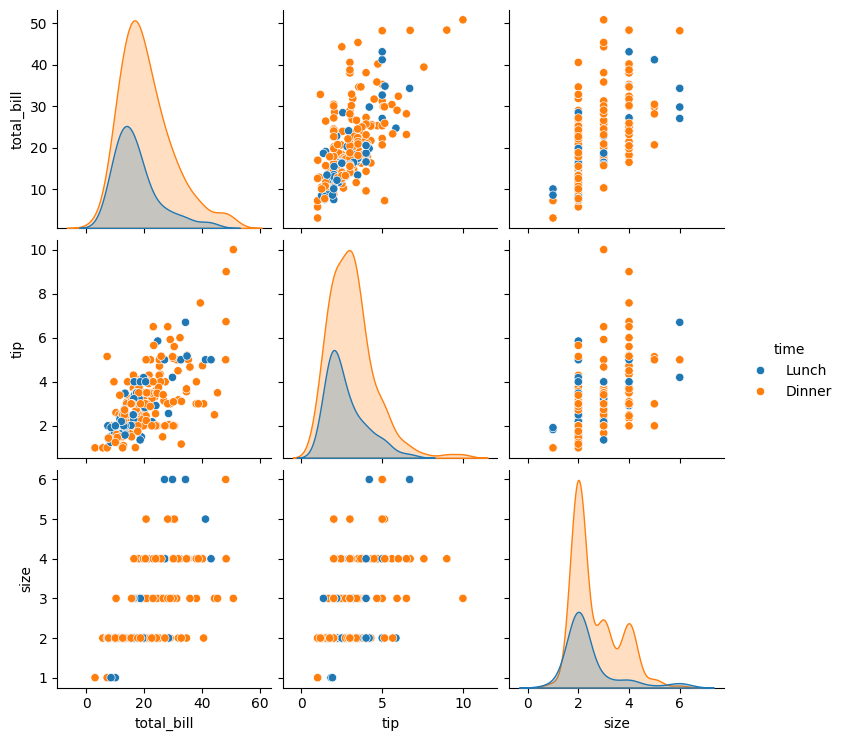

In [22]:
# 6. Advanced Visualization - Pair Plot
plt.figure(figsize=(10,8))
sns.pairplot(tips, hue='time')
plt.show()
plt.close()

In [ ]:
# 7. Group Analysis
print("\nAverage tips by different groups:")
print("\nBy day:")
print(tips.groupby('day')['tip'].mean().sort_values(ascending=False))



Average tips by different groups:

By day:
day
Sun     3.255132
Sat     2.993103
Thur    2.771452
Fri     2.734737
Name: tip, dtype: float64


/var/folders/1c/mfrw1gp91h96l8wfpv2ctv080000gn/T/ipykernel_79287/2314629358.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby('day')['tip'].mean().sort_values(ascending=False))


In [26]:
print("\ntime:")
print(tips.groupby('time')['tip'].mean())


time:
time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64


/var/folders/1c/mfrw1gp91h96l8wfpv2ctv080000gn/T/ipykernel_79287/3016127938.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby('time')['tip'].mean())


In [28]:
print("\n by gender")
print(tips.groupby('sex')['tip'].mean())


 by gender
sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64


/var/folders/1c/mfrw1gp91h96l8wfpv2ctv080000gn/T/ipykernel_79287/2472997101.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby('sex')['tip'].mean())


In [30]:
print("\nTip percentage analysis:")
tips['tip_percentage'] = (tips['tip'] / tips['total_bill']) * 100
print("\nAverage tip percentage:")
print(tips['tip_percentage'].mean())


Tip percentage analysis:

Average tip percentage:
16.08025817225047


In [ ]:
print("\nTip percentage by day:")
print(tips.groupby('day')['tip_percentage'].mean().sort_values(ascending=False))

# tips.to_csv('analyzed_tips.csv', index=False)
# print("\nAnalyzed data saved to 'analyzed_tips.csv'")



Tip percentage by day:
day
Fri     16.991303
Sun     16.689729
Thur    16.127563
Sat     15.315172
Name: tip_percentage, dtype: float64


/var/folders/1c/mfrw1gp91h96l8wfpv2ctv080000gn/T/ipykernel_79287/705540622.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby('day')['tip_percentage'].mean().sort_values(ascending=False))
